# [ ANOVA (분산분석) ]
- 3개 이상 집단의 모평균 차이를 검정
    - cf) 2개 집단 모평균 차이 검정? : t-test

<img src = "https://i.esdrop.com/d/f/s6N1SDUxar/NwEYHb3LNO.jpg">

# < 목차 >  
```
0. 분산분석의 가정
1. One-way ANOVA
2. 사후검정
3. Two-way ANOVA
4. Type에 따른 ANOVA
```

In [1]:
# 라이브러리 import

import pandas as pd
pd.set_option('display.max_columns',200)

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container {width :95% !important;}</style>"))

# 한글 그래프
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
        
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결

# [ 0. 분산분석의 가정]
- 정규성, 등분산성, 독립성
- 자주쓰는 라이브러리만 여기에 정리함 (자세한 것은 핵심만 요약한 통계와 머신러닝 파이썬 코드북 14Op 참고)

## 1. 정규성 : 각 표본의 반응변수(y)는 정규분포를 따라야한다.
### 가설
- 귀무가설 : 데이터가 정규성을 따른다. (정규성 만족)
    - 표본의 모집단이 정규분포와 차이가 없다.
- 대립가설 : 데이터가 정규성을 따르지 않는다. (정규성 불만족)
    - 표본의 모집단이 정규분포와 차이가 있다.

### 정규성 검정 : `shapiro()`
- 모수 검정, 비모수 검정을 결정하기 위한 방법

In [ ]:
from scipy.stats import shapiro
s, p = shapiro(data1) # 각 데이터에 대해 실행

## 2. 등분산성 : 모든 집단의 반응변수(y)의 분산이 동일해야한다.
### 가설
- 귀무가설 : 등분산을 만족한다. (집단 간 모분산에는 차이가 없다.)
    - 귀무가설 : 모든 그룹들의 분산은 동일하다.
- 대립가설 : 등분산을 만족하지 않는다. (집단 간 모분산에는 차이가 있다.)
    - 대립가설 : 그룹들 중 적어도 한 그룹의 모분산이 동일하지 않다.

### 정규성을 만족 X, 등분산성 검정 : `levene()`

In [ ]:
from scipy.stats import levene
levene(data1, data2)

### 정규성을 만족 O, 등분산성 검정 : `bartlett()`

In [ ]:
from scipy.stats import bartlett
s, p = bartlett(data1, data2)

### Levene vs. Bartlett (△)
- Levene 검정은 그룹 내 오차의 분포를 정규분포 형태로 가정하지 않는다. 
    - 따라서, 정규성을 따르지 않는 데이터에 대해서도 상대적으로 강건한 검정 방법이다.
- Bartlett 검정은 그룹 내 오차의 분포를 정규분포로 가정한다.
    - 따라서, 정규성 가정을 만족하는 경우에 적용할 수 있다.
    - 그룹 간 분산의 비교에 있어 두 개 이상의 그룹에 대해서 적용할 수 있지만, 그룹 간 샘플 크기가 동일한 경우에 적합하다.

## 3. 독립성 : 각 관찰값이 독립적이어야한다.
    - 일반적으로 수집한 관찰값은 독립적으로 수집되었다고 보기때문에, 독립성 검정은 따로 진행하지 않는 편

---

# [ 1. One-way ANOVA ] 

## 개념
- 인자, 요인 (factor) : 학년과 같이 모집단의 그룹을 구분하는데 사용되는 변량을 그룹 또는 인자(factor)라고 하는데 대부분 이산형 변량이다. 
- 수준(level) : 인자가 가지는 값들을 인자의 수준(level)이라고 하며, 이들 수준의 개수가 비교되는 모집단의 개수가 된다. 

이와 같이 하나의 인자가 반응변량에 미치는 영향을 조사하는 분산분석법을 일원분산분석(one-way ANOVA)이라 한다.


## 예시
- 어느 대학에서 각 학년별 도서관 평균이용시간이 같은가?
- 세 가지 다른 품종의 벼의 수확량이 같은가?
- 어떤 화학반응에서 네 가지 다른 온도에서 반응속도가 같은가?
- 도시별 대졸자의 월평균 임금이 같은가?

## 가설
- 귀무가설 $H_0 : \mu_1 = \mu_2 = \cdots = \mu_k$
- 대립가설 $H_1$ : 적어도 한 쌍의 $\mu_i$가 같지 않다.

## Example 1
5종류의 수면제 A, B, C, D, E 가 있다. 수면제를 복용한 후 졸음을 느끼기 시작한 시간을 관찰하였다. 다음의 자료에 근거하여 수면제 사이에 졸음을 느끼는 시간이 다르다고 할 수 있는가를 알아보자.

(단위 : 분)


|  A | B  |  C |  D |  E |
|---|---|---|---|---|
|  9 | 11  |  13 |  18 |  17 |
|  10 |  16 |  18 |  20 |  12 |
|  15 | 12  |  18 |  22 |  13 |
|  14 |  18 |  19 |  19 |  15 |
| 13  |  18 |  19 |  23 |  11 |

출처 : 수리통계학 (송성주, 전명식 지음) 제 5판 341p 예 6.1

### `f_oneway` 라이브러리 검정

In [96]:
import numpy as np
import scipy.stats as stats

# 각 수면제별 관찰된 졸음 시간 데이터
group_a = np.array([9, 10, 15, 14, 13])
group_b = np.array([11, 16, 12, 18, 18])
group_c = np.array([13, 18, 18, 19, 19])
group_d = np.array([18, 20, 22, 19, 23])
group_e = np.array([17, 12, 13, 15, 11])

# 일원분산분석 수행
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c, group_d, group_e)

alpha = 0.05  # 유의수준

print("일원분산분석 결과:")
print("검정 통계량 (F):", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("귀무가설을 기각합니다. 수면제 사이에 졸음을 느끼는 시간이 다릅니다.")
else:
    print("귀무가설을 기각하지 않습니다. 수면제 사이에 졸음을 느끼는 시간이 같습니다.")

일원분산분석 결과:
검정 통계량 (F): 7.721407624633434
p-value: 0.0006219339482425209
귀무가설을 기각합니다. 수면제 사이에 졸음을 느끼는 시간이 다릅니다.


### `ols`를 이용하여 분산분석표까지 출력

In [95]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 각 수면제별 관찰된 졸음 시간 데이터
group_a = np.array([9, 10, 15, 14, 13])
group_b = np.array([11, 16, 12, 18, 18])
group_c = np.array([13, 18, 18, 19, 19])
group_d = np.array([18, 20, 22, 19, 23])
group_e = np.array([17, 12, 13, 15, 11])

data = np.concatenate([group_a, group_b, group_c, group_d, group_e])
groups = ['A'] * len(group_a) + ['B'] * len(group_b) + ['C'] * len(group_c) + ['D'] * len(group_d) + ['E'] * len(group_e)

# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame({'data': data, 'groups': groups})

# 분산분석 수행
model = ols('data ~ groups', data=df).fit()
anova_table = sm.stats.anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
groups,4.0,210.64,52.66,7.721408,0.000622
Residual,20.0,136.40,6.82,NaN,NaN


# [ 2. 사후검정 (다중비교) ]
- multiple comparison
- 분산분석 후의 평균 차이에 관한 분석에서는 평균차의 검정을 두 개 이상 동시에 하여야 하는데, 이때 사용하는 통계적 검정방법
- 여러 가지 다중비교방법들 중에서 Tukey의 HSD검정 (honestly significant difference test)이 가장 많이 이용된다. 

## 라이브러리 검정
- sandbox 보다는 `statsmodels.stats.multicomp` 쓰기

## Example 1 
다음 데이터에 대해, 네 집단 간 평균 점수가 같은지 가설검정하시오. 평균 점수가 같지 않다면 어느 집단 간에 차이가 있는지를 함께 검정하시오. (유의수준 0.05)

출처 : 핵심만 요약한 통계와 머신러닝 파이썬 코드북 145p

In [34]:
import pandas as pd

data = pd.DataFrame({"A1" : [76, 80, 78, 79, 83, 74],
                     "A2" : [82, 75, 83, 78, 85, 80],
                     "A3" : [79, 87, 88, 86, 84, 82],
                     "A4" : [81, 74, 76, 78, 73, 70]})
data

,A1,A2,A3,A4
0,76,82,79,81
1,80,75,87,74
2,78,83,88,76
3,79,78,86,78
4,83,85,84,73
5,74,80,82,70


### 가설
- 귀무가설 : 집단 간 모평균에 차이가 없다.
- 대립가설 : 집단 간 모평균이 모두 같다고 할 수 없다. (적어도 하나의 모평균이 다르다)

### `melt()` 데이터 전처리 & `anova_oneway` 검정

In [35]:
# One-way ANOVA

from statsmodels.stats.oneway import anova_oneway

oa = anova_oneway(data = data.melt()['value'],
                  groups = data.melt()['variable'],
                  use_var = 'equal')

print("검정통계량 : ", oa.statistic)
print("p-value : ", oa.pvalue)

검정통계량 :  6.952861952861954
p-value :  0.002175486114794491


- p-value가 0.002로 유의수준 0.05보다 작고, 따라서 귀무가설을 기각할 수 있다.
- 즉, 집단 간 모평균이 모두 같다고 할 수 없다.
- 사후검정을 진행하여 어느 집단 간에 차이가 있는지를 살펴볼 필요가 있다.

### `pairwise_tukeyhsd()` 이용한 사후검정

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A1     A2   2.1667  0.713   -3.518  7.8513  False
    A1     A3      6.0 0.0363   0.3153 11.6847   True
    A1     A4     -3.0  0.469  -8.6847  2.6847  False
    A2     A3   3.8333 0.2647  -1.8513   9.518  False
    A2     A4  -5.1667 0.0831 -10.8513   0.518  False
    A3     A4     -9.0 0.0014 -14.6847 -3.3153   True
-----------------------------------------------------


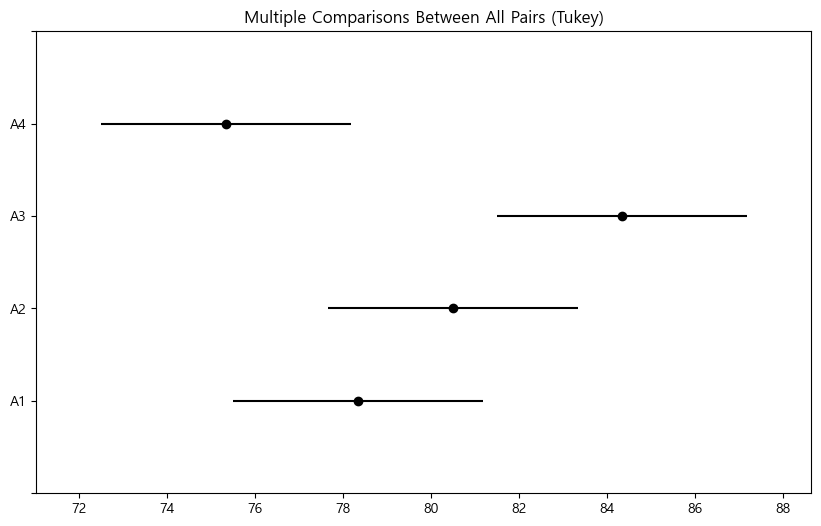

In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD 사후검정 수행
posthoc = pairwise_tukeyhsd(data.melt()['value'], data.melt()['variable'])

# 결과 출력
print(posthoc)

posthoc.plot_simultaneous()
plt.show()

- 검정 결과, 귀무가설이 기각된 부분을 살펴보면 A1, A3 간 그리고 A3, A4 간에 모평균 차이가 있는 것으로 확인된다.
- 또한 그래프에서 A1 & A3, A3 & A4 간 겹치는 부분이 없는 것으로 확인된다.

참고 : 검정결과표에서 p-adj는 조정된 p-value로, 유의수준 0.05보다 적은 경우 reject True로 판명되어 귀무가설을 기각하게 된다.

## Example 2 : ADP 실기 29회
아래 데이터는 a,b,c,d 네 차종 각각 5회 실험 시 범퍼 파손 정도이다. (단, 각 모집단은 정규분포를 따르며 모집단 간 등분산성을 가정한다.)

- 1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.
- 2. 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

### 접근방법
- 데이터 숫자가 적지만, 정규분포와 등분산에 대한 가정을 조건이 주어졌기 때문에 '모수적 검정인 일원 분산분석'을 통해서 그룹 간 차이가 존재하는지 확인한다.

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/29/p7.csv')
df.head()

,name,ratio
0,A,10.993428
1,A,9.723471
2,A,11.295377
3,A,13.046060
4,A,9.531693


In [30]:
df["name"].value_counts()

A    5
B    5
C    5
D    5
Name: name, dtype: int64

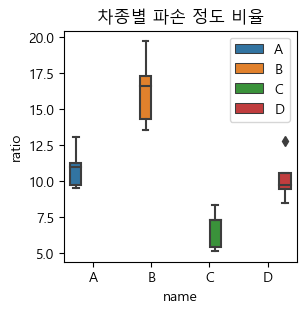

In [4]:
plt.figure(figsize=(3,3))
sns.boxplot(x ='name', y='ratio', data = df, hue='name')

plt.legend(loc='upper right')  # 범례 위치 설정
plt.title('차종별 파손 정도 비율')
plt.show()

### 1. 각 차종 별 범퍼 파손의 정도에 차이가 유의한지 검정하라.

### 가설
- 귀무가설 : 각 차종 별 범퍼 파손 정도에 차이가 없다.
- 대립가설 : 각 차종 별 범퍼 파손 정도에 차이가 있다. 


### `f_oneway`를 이용한 검정

In [23]:
# 일원 분산분석 수행

from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(df.query("name =='A'")['ratio'], 
                                      df.query("name =='B'")['ratio'], 
                                      df.query("name =='C'")['ratio'], 
                                      df.query("name =='D'")['ratio'])

print("검정통계량 : {:.3f}".format(f_statistic))
print("p-value : {:.3f}".format(p_value))

검정통계량 : 24.977
p-value : 0.000


- p-value가 0.000으로 유의수준 0.05보다 작아 귀무가설을 기각한다.
- 즉, 각 차종별 범퍼 파손 정도에 차이가 있다고 할 수 있으므로, 사후분석을 시행한다.

### 2. 귀무가설을 채택한다면 그 의미를 해석하고, 귀무가설을 기각하였다면 사후분석을 시행하라.

### `pairwise_tukeyhsd` 이용한 사후검정
- 귀무가설 : 4개 그룹의 차이가 존재하지 않는다
- 대립가설 : 4개 그룹들 중 차이가 있는 그룹이 존재한다

In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df['ratio'], df['name'], alpha=0.05)
display(posthoc.summary())

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,5.3934,0.001,2.1785,8.6083,True
A,C,-4.2156,0.0085,-7.4305,-1.0007,True
A,D,-0.7086,0.9207,-3.9235,2.5063,False
B,C,-9.609,0.0,-12.8239,-6.3941,True
B,D,-6.102,0.0003,-9.3169,-2.8871,True
C,D,3.507,0.0302,0.2921,6.7219,True


- 결과적으로 A와 D그룹을 비교했을때 p-value는 0.92로 귀무가설을 기각하지 못한다
- 나머지 모든 그룹쌍 사이에는 차이가 존재하는 것을 확인할 수 있다.

---

# [ 3. Two-way ANOVA ]
## 개념
- 요인이 2개 (독립변수가 2개)

- 분산분석에서 반응변량에 영향을 주는 인자(factor)가 2개 있는 경우를 이원분산분석(two-way analysis of variance)
- 반응변량은 2개 인자들의 각 수준의 조합에서 관측된다.
- 일반적으로 실험 결과의 신뢰도를 높이기 위하여 가능하면 각 인자(A와 B라 부르자) 수준들의 조합에서 2회 이상의 실험을 반복하는 것이 바람직하다.


### 주효과(main effect) 검정
- 각 인자 수준의 조합에서 여러 번 반복 실험으로 데이터를 얻는 경우, 일원분산분석과 유사하게 인자 A의 각 수준별 모평균이 같은지 검정(인자 A의 주효과 검정)
- 인자 B의 각 수준별 모평균이 같은지 검정 (인자 B의 주효과 검정) 

### 교호작용효과(interaction effect) 검정
- 한 인자의 효과가 다른 인자의 수준에 따라 다른가를 검정
- 교호작용효과는 **한 인자의 효과가 다른 인자의 수준의 변화에 따라 변하는 모형에서 존재**한다.


## 예시
예를 들어, 어느 화학공정에서 온도가 낮을 때는 압력이 높을수록 생산량이 많고, 온도가 높을 때는 압력이 낮을수록 생산량이 많다면 온도와 압력의 두 인자 간에 교호작용효과가 있다고 할 수 있다. 



### 라이브러리 검정
```python 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# 예시. C() : 범주형(factor) 변수로 취급하며, 이를 컬럼으로 변환
formula = 'AveragePrice ~ C(avocado_type) * C(region)' 
model = ols(formula, avocado).fit()
```

- 중요 : 범주형 변수에 대해서는 C()가 필수! 
    - C의 유무에 따라 결과 값이 상이함

## Example 1 : ADP 실기 21회
이원분산분석을 수행하고 통계표를 작성하시오. 
- 변수 3개(하나는 수치형 변수/ 나머지 두 개는 범주형 변수)
- 원래 시험 : 변수 3개(하나는 abcde 각각을 값으로 갖는 범주형 변수, 나머지 두 개는 수치형 연속변수)

In [38]:
# 데이터 생성

import pandas as pd
import numpy as np

avocado = pd.read_csv('../Data/avocado.csv')
avocado = avocado[["AveragePrice","type","region"]]

avocado = avocado[(avocado['region']=='Orlando') |\
                  (avocado['region']=='Boston' )|\
                  (avocado['region']=='Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


### 접근 방법
- 이원분산분석은 종속변수(반응변수)에 대해 두 개의 범주형 변수 A,B의 영향을 알아보기 위해 사용되는 검증 방법
- 독립변수 두 개 이상 집단 간 차이가 유의한지 검증

### 가설
<b> 가. 교호작용효과 검정에 대한 가설</b><br>
    1) 귀무가설 H0: region과 avocado type 간에는 교호작용 효과가 없다. <br>
    2) 대립가설 H1: region과 avocado type 간에는 교호작용 효과가 있다. <br>


<b> 나. 주효과 검정에 대한 가설</b> <br>
    1) 귀무가설 H0: region 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
    2) 대립가설 H1: region 종류에 따른 AveragePrice 차이는 존재한다. <br> 
    3) 귀무가설 H0: type 종류에 따른 AveragePrice 차이는 존재하지 않는다. <br>
    4) 대립가설 H1: type 종류에 따른 AveragePrice 차이는 존재한다. <br> 

In [40]:
# 독립변수 type,region / 종속변수 AveragePrice을 Series로 변경 

AveragePrice = avocado["AveragePrice"]
avocado_type = avocado["type"]
region = avocado["region"]

### 분산분석 수행 

In [44]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# C() :범주형(factor) 변수로 취급하며, 이를 컬럼으로 변환
formula = 'AveragePrice ~ C(avocado_type) * C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


#### typ=2 없애면 mean_sq가 함께 출력

In [45]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# C() :범주형(factor) 변수로 취급하며, 이를 컬럼으로 변환
formula = 'AveragePrice ~ C(avocado_type) * C(region)' 
model = ols(formula, avocado).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(avocado_type),1.0,56.111007,56.111007,828.218296,1.989417e-133
C(region),2.0,0.432136,0.216068,3.189242,4.161918e-02
C(avocado_type):C(region),2.0,1.878817,0.939409,13.866003,1.146622e-06
Residual,1008.0,68.291047,0.067749,NaN,NaN


[결과해석] 

1. 주효과(type,region) 모두 AveragePrice에 영향을 미침. (2개 인자 모두 pvalue가 일반적인 유의수준 0.05이하, 귀무가설 기각)
    - 단 주효과중에서 type의 영향력이 훨씬 더 큼. (p value값)
    - region은 p값이 0.05근처로서, 통계적으로 경계에 있기 때문에, 주의깊게 확인 필요

</br>

2. 교호작용 인자도 유의하다.(교호작용 있음) p-value 0.05 이하임

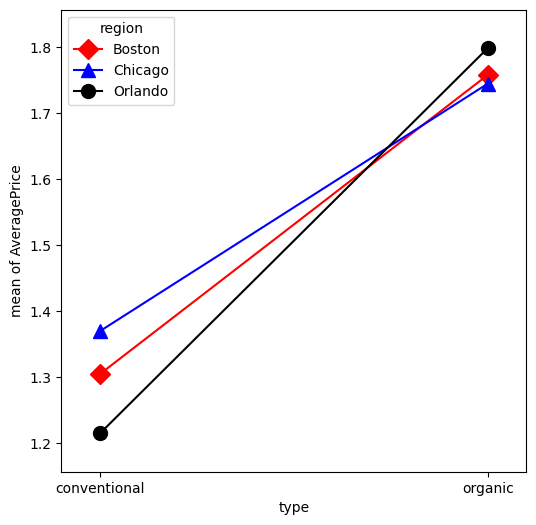

In [12]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(avocado_type, 
                       region , 
                       AveragePrice,colors=['red', 'blue', 'black'], 
                       markers=['D', '^','o'], 
                       ms=10, 
                       ax=ax)

[그래프 해석] 각 선들의 패턴이 다름(교차함) --> region과 type사이에 교호작용 존재함

### 다중비교 (pairwise_tukeyhsd)

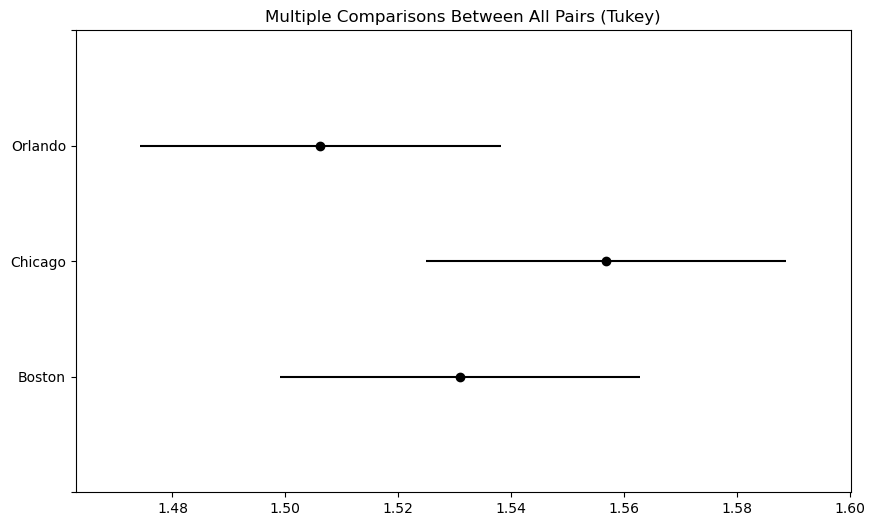

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data= avocado["AveragePrice"], groups=avocado["region"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tuekeyhsd.plot_simultaneous()

In [14]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Boston,Chicago,0.0259,0.6073,-0.0379,0.0897,False
Boston,Orlando,-0.0247,0.6356,-0.0885,0.0391,False
Chicago,Orlando,-0.0506,0.151,-0.1144,0.0132,False


## Example 2
네 가지 종류의 비료와 세 가지 벼품종에 대한 쌀 수확량을 조사하기 위하여 한 농업 시험장에서 각 수준에 대한 3회 반복 실험을 한 자료가 표 9.14와 같다.

<img src ="https://i.esdrop.com/d/f/s6N1SDUxar/WxStLq7gyG.jpg" width="600"/>


- 1) 비료와 벼의 각 수준별 조합에 대한 수확량 평균을 구하라.
- 2) 비료와 벼품종의 주효과를 검정하고 두 인자의 교호작용에 대하여 검정하라.
- 3) 이원분산분석 검정 결과를 확인하라.

[출처 : 예 9.6](http://www.estat.me/estat/eLearning/kr/eStatU/chapter09.html)

In [104]:
# 데이터 생성 및 전처리

import pandas as pd

df = pd.DataFrame(
    {
        '벼품종1': [[64, 66, 70], [65, 63, 58], [59, 68, 65], [58, 50, 49]],
        '벼품종2': [[72, 81, 64], [57, 43, 52], [66, 71, 59], [57, 61, 53]],
        '벼품종3': [[74, 51, 65], [47, 58, 67], [58, 45, 42], [53, 59, 38]],
    }
)

data = {
    '비료': [],
    '벼품종': [],
    '수확량': [],
}

for 비료_index, 벼품종_values in enumerate(df.values):
    for 벼품종, 수확량_list in enumerate(벼품종_values, start=1):
        for 수확량 in 수확량_list:
            data['비료'].append(비료_index + 1)
            data['벼품종'].append(벼품종)
            data['수확량'].append(수확량)

new_df = pd.DataFrame(data)
print(new_df)

    비료  벼품종  수확량
0    1    1   64
1    1    1   66
2    1    1   70
3    1    2   72
4    1    2   81
5    1    2   64
6    1    3   74
7    1    3   51
8    1    3   65
9    2    1   65
10   2    1   63
11   2    1   58
12   2    2   57
13   2    2   43
14   2    2   52
15   2    3   47
16   2    3   58
17   2    3   67
18   3    1   59
19   3    1   68
20   3    1   65
21   3    2   66
22   3    2   71
23   3    2   59
24   3    3   58
25   3    3   45
26   3    3   42
27   4    1   58
28   4    1   50
29   4    1   49
30   4    2   57
31   4    2   61
32   4    2   53
33   4    3   53
34   4    3   59
35   4    3   38


### 중요 POINT
- 비료와 벼품종은 숫자로 인코딩된 형태로, '범주형' 변수임.
- 따라서 이원분산분석 시 C(범주형 칼럼명) 으로 코딩해줘야한다!


### 2) 비료와 벼품종의 주 효과 검정 & 두 인자 교호작용 검정
#### 2-1) 비료의 주효과 검정
$H_0$ : 네 종류 비료의 평균수확량은 같다.

<br>

#### 2-2) 벼품종의 주효과 검정
$H_0$ : 세 가지 벼품종에 대한 평균수확량은 같다.

<br>

#### 2-3) 두 인자 교호작용 검정
$H_0$ : 벼와 비료 사이에는 교호작용이 없다.

In [110]:
# 분산분석 수행
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = '수확량 ~ C(비료) * C(벼품종)'
model = ols(formula, new_df).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(비료),1002.888889,3.0,6.017333,0.003307
C(벼품종),342.388889,2.0,3.081500,0.064393
C(비료):C(벼품종),588.944444,6.0,1.766833,0.148795
Residual,1333.333333,24.0,NaN,NaN


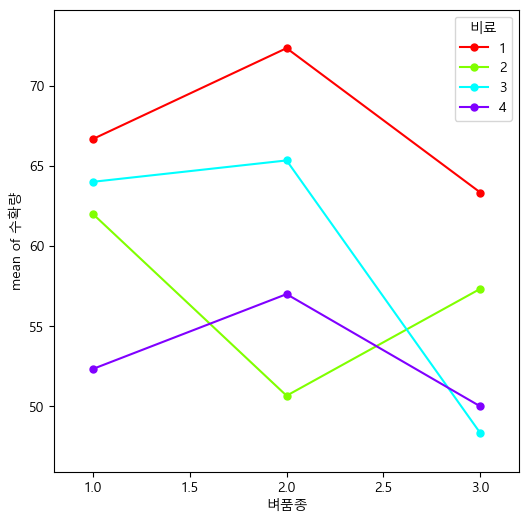

In [111]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
fig = interaction_plot(new_df["벼품종"], 
                       new_df["비료"], 
                       new_df["수확량"],
                       # colors=['red', 'blue', 'black'], 
                       # markers=['D', '^','o'], 
                       ms=10, 
                       ax=ax)
plt.show()

- 따라서 비료의 종류에 따라 평균수확량이 같다는 귀무가설은 기각된다. 즉, 사용한 비료의 종류에 따라 수확량의 차이가 있다.
- 벼품종에 따라 평균수확량이 같다는 귀무가설은 기각하지 못한다. 즉, 벼의 종류에 따라 수확량의 차이가 있다는 충분한 증거가 없다.

</br>

- 따라서 교호작용이 있다고 할 수 없고 [그림 9.25]의 평균수확량의 그림에 나타난 교호작용효과는 무시할 수 있을 정도로 작거나, 다른 오차에 기인한 우연한 것일 수 있다고 해석할 수 있다.
- 아래 그래프에서 벼품종 1은 사용하는 비료에 관계없이 벼품종 3보다 항상 수확량이 많다는 것을 보여준다. 벼품종 2는 사용하는 비료의 종류에 따라 수확량의 변화가 심하며(즉, 교호작용이 있다), 비료의 종류 1을 사용하면 대체로 벼의 품종에 관계없이 높은 수확량을 얻을 수 있다는 것을 알 수 있다.

---

# [ 4. Type에 따른 ANOVA 분석 방법 ]

## Type I ANOVA : 변수 순서 중요한 경우
- Type I ANOVA는 변수를 하나씩 모델에 추가하는 방식으로 분산분석을 수행한다.
- **변수를 추가할 때, 이미 추가된 변수와의 상호작용은 고려하지 않는다.**
- 이 방법은 순서에 따라 결과가 달라지므로, **변수의 순서가 중요**한 경우에 유용하다.
- 그러나 변수 간의 상호작용이 존재하는 경우 잘못된 결과를 도출할 수 있다.


## Type II ANOVA : 변수를 추가할 때, 이미 추가된 변수와의 상호작용을 고려
- Type II ANOVA는 **변수를 추가할 때, 이미 추가된 변수와의 상호작용을 고려**한다.
- 이 방법은 부분효과를 측정하며, 다른 변수들의 존재 여부와 관계없이 각 변수의 독립적인 영향을 평가한다.
- 이 방법은 변수 간의 상호작용이 존재하는 경우에도 일관된 결과를 제공한다.
- 하지만 변수의 순서에 따라 결과가 달라지는 Type I ANOVA와는 달리, 변수의 순서가 중요하지 않다.


## Type III ANOVA : 비균형설계자료 & 상호작용 관점
- 카테고리별로 데이터 값이 비균형 설계되었을 때 사용
- Type III ANOVA는 **변수를 추가할 때, 이미 추가된 변수와의 상호작용 및 다른 변수들의 존재 여부를 모두 고려**한다.
- 이 방법은 변수의 부분효과와 상호작용을 모두 고려하여 종속 변수에 대한 각 변수의 독립적인 영향을 평가한다.
- 변수 간의 상호작용이 있는 경우에도 올바른 결과를 제공한다.
- 변수의 순서에 따라 결과가 달라지는 Type I ANOVA와는 달리, 변수의 순서가 중요하지 않다.

    → 상호작용 관점에서 제일 우선시 되는 방법 !!
   
   
   
- 만약에 데이터가 균일하다면 type1,2,3 제곱합은 모두 같은 결과가 나온다.

## Example 1
[참고 : 비균형자료의 이원분산분석](https://mindscale.kr/course/basic-stat-python/26/)

In [70]:
df_poison = pd.read_csv("https://raw.githubusercontent.com/guru99-edu/R-Programming/master/poisons.csv", index_col=0)
df_poison.head()

,time,poison,treat
1,0.31,1,A
2,0.45,1,A
3,0.46,1,A
4,0.43,1,A
5,0.36,2,A


In [74]:
df_poison["treat"].value_counts()

A    12
B    12
C    12
D    12
Name: treat, dtype: int64

- 예시를 위해 자료를 하나 삭제하여 비균형 설계로 바꿔보자.
- 삭제된 자료는 poison은 1, treat는 A이다. 해당하는 집단의 표본 수가 다른 집단보다 하나씩 적은 것을 확인할 수 있다.
- 이제 집단별 표본수가 동일하지 않으므로 비균형설계자료가 되었다.

In [85]:
df_poison = df_poison.iloc[1:,:].reset_index(drop=True)  # 데이터의 첫 행을 제거
df_poison.head()

,time,poison,treat
0,0.46,1,A
1,0.43,1,A
2,0.36,2,A
3,0.29,2,A
4,0.40,2,A


In [88]:
df_poison["treat"].value_counts() # 불균형자료

B    12
C    12
D    12
A    10
Name: treat, dtype: int64

### 불균형자료의 경우 `typ=3` 옵션 지정

In [90]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', df_poison).fit()
anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,0.396050,1.0,17.116690,0.000218
C(poison),0.076040,2.0,1.643168,0.208352
C(treat),0.329246,3.0,4.743180,0.007199
C(poison):C(treat),0.240426,6.0,1.731811,0.143561
Residual,0.786700,34.0,NaN,NaN


### two-way ANOVA 결과 보고 예시
time에 대하여 poison과 treat를 요인으로 하는 이원분산분석을 실시한 결과, 
- poison의 주효과는 유의미하지 않으며,(p > 0.05)
- treat의 주효과 또한 유의미하였으나(p < 0.05)
- poison과 treat의 유의미한 상호작용효과는 발견할 수 없었다(p > 0.05).

만약 상호작용이 유의미했다면, 다음과 같이 단순효과분석 결과를 첨부하여야 함 (단순 예시)
```
- poison과 treat의 유의미한 상호작용 효과에 대하여 단순효과분석을 실시한 결과, poison이 1인 집단에서는 treat의 단순 주효과는 유의미하였고(F(3,36) = 6.8031, p < 0.05), poison이 2인 집단도 treat의 단순 주효과는 유의미하였으나(F(3,36) = 10.0367, p < 0.05), poison이 3인 집단에서는 treat의 단순 주효과가 유의미하지 않았다(F(3,36) = 0.7145, p > 0.05).
```

## Example 2 : ADP 실기 27회 (8/26 전 데이터마님버전으로 풀이 업로드 예정)
지하철 호선과 월별, 승객 수 간 상관관계가 있는 지 확인 (Type III Anova 사용)
1. 귀무가설과 대립가설을 설정하라
2. 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [5]:
import pandas as pd
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


### 접근 방법
- 상호작용 = 교호작용 $\rightarrow$ 다원분산분석

#### Type 3 ANOVA란?
- **비균형설계자료**의 경우 사용하는 분산분석 방법
- value_counts()로 값들 확인해보고, 비균형설계임을 간단히라도 언급해주자 !
- anova_lm 옵션에 typ=3만 추가해주면 됨

```python
print(anova_lm(model, typ=3))     # type 3 ANOVA
```

In [20]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   line    72 non-null     int64
 1   month   72 non-null     int64
 2   total   72 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [21]:
df_subway["line"].value_counts()

1    24
2    24
3    24
Name: line, dtype: int64

In [22]:
df_subway["month"].value_counts()

1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
Name: month, dtype: int64

### 1) 귀무가설과 대립가설을 설정하라
- 귀무가설(H0) : 지하철 호선과 월별은, 승객 수와 상관관계가 없다.
- 대립가설(H1) : 지하철 호선과 월별은, 승객 수와 상관관계가 있다.


```
가. 상호작용효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선과 월별, 승객 수 간 상관관계가 없다.
- 대립가설 H1: 지하철 호선과 월별, 승객 수 간 상관관계가 있다.

나. 주효과 검정에 대한 가설
- 귀무가설 H0: 지하철 호선 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 지하철 호선 승객 수 차이는 존재한다.

- 귀무가설 H0: 월별 승객 수 차이는 존재하지 않는다.
- 대립가설 H1: 월별 승객 수 차이는 존재한다.
```

### 2) 검정통계량과 유의확률을 구하고, 대립가설 채택여부를 기술하라 (반올림하여 소수점 아래 둘째자리까지 표기하시오)

In [26]:
import statsmodels.formula.api as smf     
from statsmodels.stats.anova import anova_lm  # anova table을 생성해줌

# 모델링
# 범주형 변수는 C(변수)화 
# = total ~ line + month + line:month  # 모델링 할 때 독립변수 순서 주의!
formula = 'total ~ C(line) * C(month)' 
model = smf.ols(formula, df_subway).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     627.8
Date:                Fri, 26 May 2023   Prob (F-statistic):           2.18e-41
Time:                        13:45:11   Log-Likelihood:                -244.27
No. Observations:                  72   AIC:                             560.5
Df Residuals:                      36   BIC:                             642.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    1316.5000      7.198    182.908      0.000    1301.903    1331.097
C(line)[T.2]                  321.5000     10.179     31.585      0.000     300.856     342.144
C(line)[T.3]                   10.0000     10.179      0.982      0.332     -10.644      30.644
C(month)[T.2]                 -10.0000     10.179     -0.982      0.332     -30.644      10.644
C(month)[T.3]                  -5.0000     10.179     -0.491      0.626     -25.644      15.644
C(month)[T.4]                -110.5000     10.179    -10.856      0.000    -131.144     -89.856
C(month)[T.5]                  -9.0000     10.179     -0.884      0.382     -29.644      11.644
C(month)[T.6]                  -6.0000     10.179     -0.589      0.559     -26.644      14.644
C(month)[T.7]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.8]                 -80.5000     10.179     -7.908      0.000    -101.144     -59.856
C(month)[T.9]                  20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.10]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.11]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(month)[T.12]                 20.0000     10.179      1.965      0.057      -0.644      40.644
C(line)[T.2]:C(month)[T.2]    131.0000     14.395      9.100      0.000     101.805     160.195
C(line)[T.3]:C(month)[T.2]     42.5000     14.395      2.952      0.006      13.305      71.695
C(line)[T.2]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.3]:C(month)[T.3]    -15.0000     14.395     -1.042      0.304     -44.195      14.195
C(line)[T.2]:C(month)[T.4]    221.0000     14.395     15.352      0.000     191.805     250.195
C(line)[T.3]:C(month)[T.4]    135.5000     14.395      9.413      0.000     106.305     164.695
C(line)[T.2]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.3]:C(month)[T.5]     -1.0000     14.395     -0.069      0.945     -30.195      28.195
C(line)[T.2]:C(month)[T.6]     86.5000     14.395      6.009      0.000      57.305     115.695
C(line)[T.3]:C(month)[T.6]      3.0000     14.395      0.208      0.836     -26.195      32.195
C(line)[T.2]:C(month)[T.7]    -50.0000     14.395     -3.473      0.001     -79.195     -20.805
C(line)[T.3]:C(month)[T.7]    -37.0000     14.395     -2.570      0.014     -66.195      -7.805
C(line)[T.2]:C(month)[T.8]    201.5000     14.395     13.998      0.000     172.305     230.695
C(line)[T.3]:C(month)[T.8]    112.0000     14.395      7.780      0.000      82.805     141.195
C(line)[T.2]:C(month)[T.9]     20.5000     14.395      1.424      0.163      -8.695      49.695
C(line)[T.3

In [25]:
# type 3 ANOVA 결과
display(anova_lm(model, typ=3))

,sum_sq,df,F,PR(>F)
Intercept,3.466345e+06,1.0,33455.335657,4.849033e-55
C(line),1.336630e+05,2.0,645.022520,6.417946e-29
C(month),3.942483e+04,11.0,34.591616,7.896179e-16
C(line):C(month),9.696908e+04,22.0,42.540665,1.582232e-19
Residual,3.730000e+03,36.0,NaN,NaN


#### 결과 테이블의 C(line):C(month)를 보면 서로의 차이를 총분산으로 설명하는 F 통계량에 대한 P-value가 0.05보다 작다. 따라서 귀무가설을 기각한다.

#### 즉, 둘의 상관관계(교호작용, 상호작용)는 존재한다고 할 수 있다.

### 참고 : 교호작용 시각화 그래프 

In [27]:
# 독립변수 cyl,am와 종속변수 mpg을 Series로 변경 

total = df_subway["total"]
line = df_subway["line"]
month = df_subway["month"]

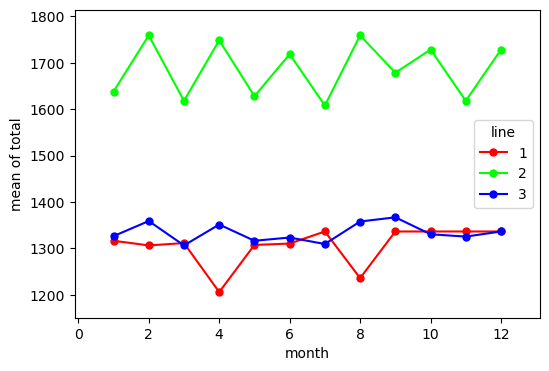

In [33]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(month,line, total,ms=10, ax=ax)

#### 교호작용 그래프 결과 해석
- 일반적으로 상호작용 그래프에서 두 선이 서로 교차하고 있을 때, x축에 있는 독립변수와 그래프에서 시각화된 독립변수 간에는 상호작용이 존재한다고 해석할 수 있다.

In [92]:
import pandas as pd
df_subway = pd.read_csv('https://github.com/johyunkang/adp_certificate/files/10883822/subway.csv')
df_subway.head()

,line,month,total
0,1,1,1310
1,1,2,1300
2,1,3,1305
3,1,4,1200
4,1,5,1301


In [94]:
df_subway["line"].value_counts() # 균형자료

1    24
2    24
3    24
Name: line, dtype: int64